### Tarefa:
Neste projeto, será construido um classificador para prever se um caso de empréstimo poderá ser pago ou não.

Iremos carregar um conjunto de dados históricos de solicitações para empréstimos anteriores, limpar os dados e aplicar algoritmos de classificação diferentes. Serão usados os seguintes algoritmos para construir os modelos:

### Neste Notebook será aplicado o seguinte modelo: **Árvore de decisão**

O resultado é relatado como a precisão de cada classificador, usando as seguintes métricas quando estas são aplicáveis:

#### Índice de Jaccard

#### F1-score

#### LogLoass



### Outros Notebooks disponíveis

[Notebook de Entrada (Indice de trabalhos)](#about_dataset)

[k-vizinhos mais próximos](https://github.com/olavidix/Aprendizado-de-maquina-com-Python/blob/main/O_melhor_classificador_KNN.ipynb)


<h1>Indice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">O nosso conjunto de dados</a></li>
        <li><a href="#Visualização_análise_dados">Visualização e análise de dados</a></li>
        <li><a href="#pre-processamento">Pré-processamento</a></li>
        <li><a href="#configurando_arvore_decisao">Configurando a Árvore de Decisão</a></li>
        <li><a href="#modelagem">Modelagem</a></li>
        <li><a href="#previsao">Previsão</a></li>
        <li><a href="#avaliacao">Avaliação</a></li>
        <li><a href="#visualizacao">Visualização da Árvore de Decisão</a></li>
    </ol>
</div>
<br>
<hr>


<div id="about_dataset">
    <h2>O nosso conjunto de dados</h2>
</div>

Vamos começar por criar um conjunto de dados histórico de solicitações para empréstimos anteriores.

O código (Python) a seguir é usado para gerar um arquivo CSV com as colunas abaixo indicadas e valores aleatórios. Vou utilizar a biblioteca pandas e random para facilitar a criação e gravação do arquivo.

**Número** (sequencial)

**Região** (1, 2, 3 ou 4)

**Idade** (entre 18 e 65 anos)

**Casado** (1 ou 0)

**Rendimentos** (entre 100 e 200)

**Género** (1 ou 0)

**Aprovação** (1 ou 0)

Uma vez que a base de dados que constitui o DataFrame é fictício e para facilitar a interpretação dos dados vamos criar algumas condições para a aprovação dos empréstimos.


In [1]:
import pandas as pd
import random

# Número de registros no conjunto de dados
num_registros = 1000

# Inicializando listas vazias para cada coluna
regioes = []
idades = []
casados = []
rendimentos = []
generos = []
aprovacoes = []

# Gerando valores aleatórios para cada coluna
for i in range(num_registros):
    regioes.append(random.choice([1, 2, 3, 4]))
    idades.append(random.randint(18, 65))
    casados.append(random.choice([1, 0]))
    rendimentos.append(random.randint(100, 200))
    generos.append(random.choice([1, 0]))
    aprovacoes.append(random.choice([1, 0]))

# Criando um DataFrame pandas com os dados gerados
dados = pd.DataFrame({
    'Região': regioes,
    'Idade': idades,
    'Casado': casados,
    'Rendimentos': rendimentos,
    'Género': generos,
    'Aprovação': aprovacoes
})

# Atualizando a coluna 'Aprovação' de acordo com as condições especificadas
for index, row in dados.iterrows():
    if row['Idade'] > 40 and row['Casado'] == 1 and row['Rendimentos'] > 150:
        dados.at[index, 'Aprovação'] = 1

# Escrevendo os dados em um arquivo CSV
# dados.to_csv('dados_emprestimos.csv', index=False)


<div id="Visualização_análise_dados">
    <h2>Visualização e análise de dados</h2> 
</div>

Agora vamos ver as primeiras cinco linhas do DataFrame que acabamos de criar

In [2]:
dados.head()

,Região,Idade,Casado,Rendimentos,Género,Aprovação
0,4,61,0,140,1,1
1,4,29,0,119,0,1
2,4,54,1,118,1,1
3,3,20,1,157,1,0
4,1,63,1,171,0,1


Vamos ver um resumo estatístico das colunas do nosso DataFrame

Este resumo inclui medidas estatísticas como contagem, média, desvio padrão, mínimo, máximo e os percentis (25%, 50% e 75%). Aqui está uma explicação de cada medida:


**count**: número de registros não nulos ou não faltantes na coluna.

**mean**: média aritmética dos valores na coluna.

**std**: desvio padrão, que é uma medida de dispersão que indica o quanto os valores se desviam da média.

**min**: valor mínimo na coluna.

**25%**: primeiro quartil (Q1), que é o valor que separa os 25% mais baixos dos valores na coluna.

**50%**: segundo quartil (Q2) ou mediana, que é o valor que separa os 50% mais baixos dos valores na coluna.

**75%**: terceiro quartil (Q3), que é o valor que separa os 75% mais baixos dos valores na coluna.

**max**: valor máximo na coluna.

In [3]:
dados.describe()

,Região,Idade,Casado,Rendimentos,Género,Aprovação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.508000,41.250000,0.482000,149.100000,0.52000,0.537000
std,1.113182,14.123065,0.499926,28.770223,0.49985,0.498879
min,1.000000,18.000000,0.000000,100.000000,0.00000,0.000000
25%,2.000000,29.000000,0.000000,124.000000,0.00000,0.000000
50%,3.000000,41.000000,0.000000,149.500000,1.00000,1.000000
75%,3.000000,54.000000,1.000000,174.000000,1.00000,1.000000
max,4.000000,65.000000,1.000000,200.000000,1.00000,1.000000


Agora vamos ver quantos emprestimos foram Aprovados (1) e quantos foram Reprovados (0)

In [4]:
dados['Aprovação'].value_counts()

1    537
0    463
Name: Aprovação, dtype: int64

Vamos explorar os nossos dados usando uma técnica de visualização.

array([[<AxesSubplot:title={'center':'Rendimentos'}>]], dtype=object)

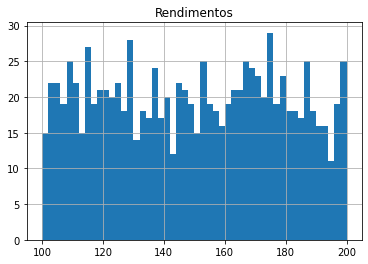

In [5]:
dados.hist(column='Rendimentos', bins=50)

<div id="pre-processamento">
    <h2>Pré-processamento</h2> 
</div>

De seguida vamos declarar as seguintes variáveis:

**X** como a matriz de características (**Feature Matrix**)

**y** como o vetor de resposta (**Response Vector**)

Assim estamos a criar a matriz de características **(X)** selecionando algumas colunas específicas ('Região', 'Idade', 'Casado', 'Rendimentos', 'Género') do conjunto de dados (dados).

Em seguida, vamos exibir as primeiras 5 linhas da matriz de características **(X)** usando **X[0:5]**.


In [6]:
X = dados[['Região', 'Idade', 'Casado', 'Rendimentos', 'Género']].values
X[0:5]

array([[  4,  61,   0, 140,   1],
       [  4,  29,   0, 119,   0],
       [  4,  54,   1, 118,   1],
       [  3,  20,   1, 157,   1],
       [  1,  63,   1, 171,   0]])

Agora podemos preencher a variável alvo (**Target**).

Neste trecho de código, estamos criando o vetor de resposta **(y)** selecionando a coluna **'Aprovação'** do conjunto de dados (**dados**).

Em seguida, exibimos as primeiras 5 linhas do vetor de resposta **(y**) usando **y[0:5]**.

Agora temos tanto a matriz de características (X) quanto o vetor de resposta (y) definidos e prontos para uso no treinamento do modelo de Árvore de Decisão.

In [7]:
# Atribuindo a coluna 'Aprovação' da variável dados ao vetor de resposta (y)
y = dados['Aprovação']

# Exibindo as primeiras 5 linhas do vetor de resposta (y)
y[0:5]


0    1
1    1
2    1
3    0
4    1
Name: Aprovação, dtype: int64

<div id="configurando_arvore_decisao">
    <h2>Configurando a Árvore de Decisão</h2> 
</div>

Usaremos a divisão treino/teste (train/test split) em nossa árvore de decisão. Vamos importar a função train_test_split do módulo sklearn.model_selection.

Neste trecho de código, estamos importando a função train_test_split do módulo sklearn.model_selection. Essa função é usada para dividir o conjunto de dados em dois subconjuntos: um para treinamento e outro para teste.

Isso permite que você treine o modelo usando um subconjunto de dados e o teste usando um subconjunto diferente, o que é útil para avaliar o desempenho e a generalização do modelo.


In [8]:
# Importando a função train_test_split do módulo sklearn.model_selection
from sklearn.model_selection import train_test_split


Neste trecho de código, estamos usando a função **train_test_split** para dividir as matrizes X e y em conjuntos de treinamento e teste.

X_trainset, X_testset, y_trainset, y_testset

Estamos usando uma proporção de 0.3 (30%) para o tamanho do conjunto de teste (**test_size=0.3**). O parâmetro **random_state=3** garante que a divisão seja reproduzível, ou seja, sempre que executarmos este código com o mesmo valor de **random_state**, obteremos a mesma divisão dos dados.

X, y, test_size=0.3 e random_state=3.


In [9]:
# Dividindo os dados em conjuntos de treinamento e teste usando a função train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)


Neste trecho de código a seguir, estamos imprimindo o formato (shape) dos arrays X_trainset e y_trainset.

Isso é útil para garantir que as dimensões dos conjuntos de treinamento sejam compatíveis antes de usá-los para treinar o modelo de Árvore de Decisão.

A primeira dimensão (número de linhas) de X_trainset e y_trainset deve ser igual, já que cada linha de X_trainset corresponde a uma entrada no y_trainset.


In [10]:
# Imprimindo o formato (shape) dos conjuntos de treinamento X_trainset e y_trainset
print('Formato do conjunto de treinamento X {}'.format(X_trainset.shape), '&', ' Tamanho do conjunto de treinamento Y {}'.format(y_trainset.shape))


Formato do conjunto de treinamento X (700, 5) &  Tamanho do conjunto de treinamento Y (700,)


### Interpretando os resultados

O resultado indica que o conjunto de treinamento X (X_trainset) possui 700 linhas e 5 colunas, ou seja, 700 exemplos de treinamento com 5 características (features) cada. As 5 colunas correspondem às características que você selecionou anteriormente ('Região', 'Idade', 'Casado', 'Rendimentos' e 'Género').

O conjunto de treinamento Y (y_trainset) possui 700 linhas e apenas 1 coluna (não mostrada explicitamente no formato). Isso significa que há 700 rótulos (labels) no conjunto de treinamento Y, um para cada exemplo no conjunto de treinamento X.

As dimensões são compatíveis, já que o número de linhas em ambos os conjuntos de treinamento é igual (700). Isso é importante porque cada linha em X_trainset (cada exemplo de treinamento com suas características) deve ter um rótulo correspondente em y_trainset. Com essas dimensões compatíveis, você pode prosseguir e treinar o modelo de Árvore de Decisão usando esses conjuntos de treinamento.

Neste trecho de código a seguir, estamos imprimindo o formato (shape) dos arrays X_testset e y_testset.

Isso é útil para garantir que as dimensões dos conjuntos de teste sejam compatíveis antes de usá-los para avaliar o desempenho do modelo de Árvore de Decisão.

A primeira dimensão (número de linhas) de X_testset e y_testset deve ser igual, já que cada linha de X_testset corresponde a uma entrada no y_testset.


In [11]:
# Imprimindo o formato (shape) dos conjuntos de teste X_testset e y_testset
print('Formato do conjunto de teste X {}'.format(X_testset.shape), '&', ' Tamanho do conjunto de teste Y {}'.format(y_testset.shape))


Formato do conjunto de teste X (300, 5) &  Tamanho do conjunto de teste Y (300,)


### Interpretando os resultados

O resultado indica que o conjunto de teste X (X_testset) possui 300 linhas e 5 colunas, ou seja, 300 exemplos de teste com 5 características (features) cada. As 5 colunas correspondem às características que você selecionou anteriormente ('Região', 'Idade', 'Casado', 'Rendimentos' e 'Género').

O conjunto de teste Y (y_testset) possui 300 linhas e apenas 1 coluna (não mostrada explicitamente no formato). Isso significa que há 300 rótulos (labels) no conjunto de teste Y, um para cada exemplo no conjunto de teste X.

As dimensões são compatíveis, já que o número de linhas em ambos os conjuntos de teste é igual (300). Isso é importante porque cada linha em X_testset (cada exemplo de teste com suas características) deve ter um rótulo correspondente em y_testset. Com essas dimensões compatíveis, você pode avaliar o desempenho do modelo de Árvore de Decisão treinado usando esses conjuntos de teste.


<div id="modelagem">
    <h2>Modelagem</h2> 
</div>


Primeiro, criaremos uma instância do DecisionTreeClassifier chamada **"emprestimos"**. Dentro do classificador, especifique **criterion="entropy"** para que possamos ver o ganho de informação de cada nó.

Neste trecho de código, estamos criando uma instância do classificador **DecisionTreeClassifier** e chamando-a de **"emprestimos"**. O parâmetro **criterion="entropy"** indica que queremos usar a entropia como medida de qualidade para a divisão dos nós da árvore de decisão. A entropia permite calcular o ganho de informação de cada nó.

Além disso, especificamos **max_depth=4**, o que limita a profundidade da árvore de decisão a um máximo de 4 níveis. Isso pode ajudar a evitar o sobreajuste **(overfitting)** e melhorar a generalização do modelo em novos dados.


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Criando uma instância do DecisionTreeClassifier chamada "emprestimos"
# Usando o critério "entropy" e profundidade máxima de 4
emprestimos = DecisionTreeClassifier(criterion="entropy", max_depth=4)
emprestimos


DecisionTreeClassifier(criterion='entropy', max_depth=4)

Em seguida, ajustaremos os dados com a matriz de características de treinamento X_trainset e o vetor de resposta de treinamento y_trainset.

Neste trecho de código, estamos usando o método fit para treinar o classificador de Árvore de Decisão chamado "emprestimos".

Fornecemos a matriz de características de treinamento (X_trainset) e o vetor de resposta de treinamento (y_trainset) como argumentos.

Isso fará com que o classificador ajuste o modelo de Árvore de Decisão aos dados de treinamento, encontrando as divisões ótimas e estrutura da árvore com base no critério de entropia que especificamos anteriormente.


In [14]:
# Treinando o modelo de Árvore de Decisão usando os conjuntos de treinamento X_trainset e y_trainset
emprestimos.fit(X_trainset, y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

<div id="previsao">
    <h2>Previsão</h2> 
</div>

Vamos fazer algumas previsões no conjunto de dados de teste e armazená-las em uma variável chamada predTree.

Neste trecho de código, estamos usando o método **predict** para fazer previsões com o classificador de Árvore de Decisão treinado chamado **"emprestimos"**. Fornecemos a matriz de características de teste **(X_testset)** como argumento. O método **predict** retorna um array de previsões, que armazenamos na variável predTree.

As previsões em predTree podem ser usadas para comparar com os rótulos verdadeiros **(y_testset)** e avaliar o desempenho do modelo de Árvore de Decisão.


In [17]:
# Realizando previsões no conjunto de dados de teste e armazenando os resultados na variável predTree
predTree = emprestimos.predict(X_testset)


Neste trecho de código, estamos imprimindo as primeiras **5 previsões** armazenadas na variável **predTree** e os primeiros **5 rótulos** verdadeiros armazenados em **y_testset**.

Isso permite comparar visualmente as previsões feitas pelo modelo de Árvore de Decisão aos rótulos verdadeiros, ajudando a ter uma noção do desempenho do modelo.


In [18]:
# Imprimindo as primeiras 5 previsões em predTree e os primeiros 5 rótulos verdadeiros em y_testset para comparação visual
print(predTree[0:5])
print(y_testset[0:5])


[1 1 1 0 0]
642    1
762    1
909    0
199    1
586    1
Name: Aprovação, dtype: int64


<div id="avaliacao">
    <h2>Avaliação</h2> 
</div>

A seguir, vamos importar as métricas do sklearn e verificar a acurácia do nosso modelo.

Neste trecho de código, estamos importando as métricas do módulo sklearn e o módulo pyplot do matplotlib.

Em seguida, calculamos a acurácia do modelo de Árvore de Decisão usando a função **accuracy_score** do módulo de métricas. A função **accuracy_score** compara os rótulos verdadeiros **(y_testset)** com as previsões feitas pelo modelo **(predTree)** e retorna a proporção de previsões corretas.

Imprimimos a acurácia do modelo para ter uma medida quantitativa do desempenho da Árvore de Decisão. 
A acurácia é uma métrica comum para avaliar modelos de classificação, mas é importante considerar outras métricas, como precisão, revocação e F1-score, dependendo do problema e do equilíbrio das classes no conjunto de dados.


In [19]:
# Importando métricas do sklearn e o módulo pyplot do matplotlib
from sklearn import metrics
import matplotlib.pyplot as plt

# Calculando a acurácia do modelo de Árvore de Decisão e imprimindo o resultado
print("Acurácia da Árvore de Decisão: ", metrics.accuracy_score(y_testset, predTree))


Acurácia da Árvore de Decisão:  0.5633333333333334


### Interpretando os resultados

O resultado indica que a acurácia do modelo de Árvore de Decisão é de aproximadamente 56,33%. A acurácia é a proporção de previsões corretas em relação ao total de previsões. Neste caso, o modelo de Árvore de Decisão está fazendo previsões corretas para 56,33% dos exemplos no conjunto de teste (X_testset e y_testset).

É importante notar que a acurácia por si só não fornece uma imagem completa do desempenho do modelo, especialmente se as classes estiverem desequilibradas no conjunto de dados. Dependendo do problema e do objetivo, você pode querer considerar outras métricas de avaliação, como precisão, revocação e F1-score, para ter uma compreensão mais aprofundada do desempenho do modelo.

Além disso, é possível que o modelo possa ser melhorado ajustando os hiperparâmetros, como a profundidade máxima da árvore ou o critério de divisão, ou utilizando técnicas como validação cruzada para otimizar o treinamento e a avaliação do modelo.


A métrica de acurácia de classificação está focada na correspondência exata entre o conjunto de rótulos previstos e o conjunto verdadeiro de rótulos. Especificamente, na classificação multirrótulo, a acurácia do subconjunto é calculada, resultando em 1,0 (100%) para correspondências perfeitas e 0,0 (0%) para correspondências imperfeitas.

<div id="visualizacao">
    <h2>Visualização da Árvore de Decisão</h2> 
</div>

Vamos visualizar a árvore

Neste trecho de código, estamos importando o módulo **tree** do **sklearn** e usando a função **plot_tree** para visualizar a árvore de decisão chamada **"emprestimos"**.

A função **plot_tree** gera um diagrama que mostra a estrutura da árvore de decisão, incluindo as divisões e os nós folha.

Em seguida, usamos a função **plt.show()** do matplotlib para exibir a visualização da árvore.

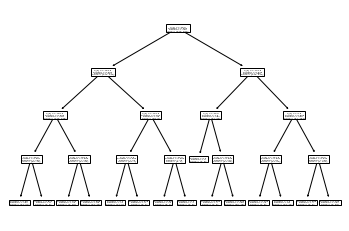

In [22]:
# Importando o módulo tree do sklearn
from sklearn import tree

# Visualizando a Árvore de Decisão emprestimos
tree.plot_tree(emprestimos)
plt.show()
